# Customer Churn Modeling using Logistic Regression

### Importing Required Libraries

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Loading Data from CSV File

In [2]:
df = pd.read_csv(r'C:\Users\user\Desktop\Data Science\ChurnData.csv')
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


### Extracting Necessary Columns

In [3]:
cdf = df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip', 'churn']]
cdf.head()

,tenure,age,address,income,ed,employ,equip,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,0.0


### Data Visualization

<IPython.core.display.Javascript object>


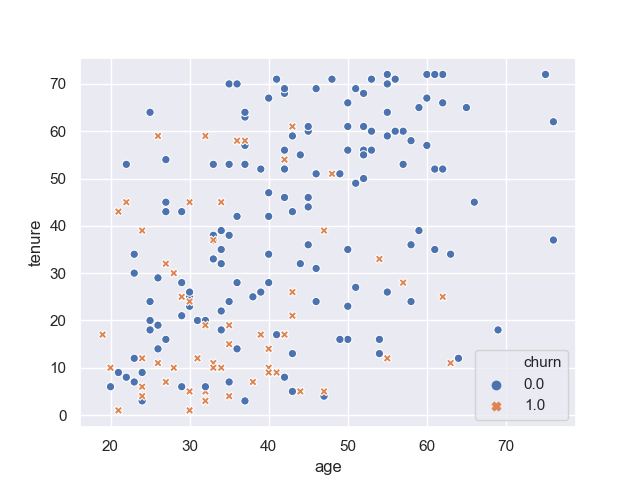

In [4]:
import seaborn as sns
sns.set()
plt.figure()
sns.scatterplot(x = cdf.age, y = cdf.tenure, hue = cdf.churn, style = cdf.churn)

### Splitting Data into Train and Test

In [5]:
from sklearn.model_selection import train_test_split
X = cdf[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']]
y = cdf['churn']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state = 0)

### Logistic Regression Model

In [6]:
from sklearn import linear_model
Lreg = linear_model.LogisticRegression(C=0.01, solver='liblinear')
Lreg.fit(X_train, y_train)
Lreg

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

### Model Accuracy

In [7]:
Lreg.score(X_test, y_test)

0.85

### Predicting Customer Churn

In [8]:
Lreg.predict([[35, 35, 4, 190.5, 5, 2, 0]])

array([0.])

In [9]:
Lreg.predict_proba([[35, 35, 4, 190.5, 5, 2, 0]])

array([[0.56707996, 0.43292004]])

### Evaluation Metrics

In [10]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_score
from sklearn.metrics import log_loss
y_test_hat = Lreg.predict(X_test)
y_test_hat_prob = Lreg.predict_proba(X_test)
print(classification_report(y_test, y_test_hat))
print("Confusion Matrix : ")
print(confusion_matrix(y_test, y_test_hat))
print("Jaccard Index = ", jaccard_score(y_test, y_test_hat))
print("Log Loss = ", log_loss(y_test, y_test_hat_prob))

              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91        31
         1.0       1.00      0.33      0.50         9

    accuracy                           0.85        40
   macro avg       0.92      0.67      0.71        40
weighted avg       0.87      0.85      0.82        40

Confusion Matrix : 
[[31  0]
 [ 6  3]]
Jaccard Index =  0.3333333333333333
Log Loss =  0.3919307158781723
